<div dir="rtl" align="center">
<font face="XB Zar" size=5>  
    <br>
    <font color=gray size=10>
        user default prediction 
    </font>
    <br>
    <hr/>
       Author: Reza Bahadori
    <br>
     <font>
         course: Data Mining
     </font>
    <br>
    <font>
        Course Instructor: Dr.Samira Loveymi
    </font>
    <hr>
<br>
</font>
</div>

<font face= "XB Zar" size=6 color=red  allign=left>PHASE #2 OF THE PROJECT</font>
<hr>
<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=5 color=red>بررسی اولیه بر روی فیچر های دیتاست</font>
    <br>
    <hr>
    <font size=5>ابتدا لازم است  مروری بر روی فیچر های این دیتاست داشته باشیم و مفهوم  هرکدام را بررسی کنیم تا به برداشت درستی از آن برسیم</font>
    <br>
    <br>
    <font face="XB Zar" size=4>
      <span style="font-weight: bold; color: gray;"  >X1 Limit Balance notioned as LIMIT_BAL</span>: میزان کردیت هر کاربر <br>
      <span style="font-weight: bold; color: gray;"  >X2 Gender notioned as SEX</span>: جنسیت کاربر (Male=1 Female=2)<br>
      <span style="font-weight: bold; color: gray;"  >X3 Education: تحصیلات کاربر به صورت کتگوری مقابل</span> : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
      <span style="font-weight: bold; color: gray;"  >X4 Marriage</span> : وضعیت تاهل کاربر : (1=married, 2=single, 3=others)<br>
      <span style="font-weight: bold; color: gray;"  >X5 Age</span> : سن کاربر <br>
      <span style="font-weight: bold; color: gray;"  >X6 - X11 (PAY_0-PAY_6)</span> :  وضعیت پرداخت های گدشته و تاخیر یا عدم تاخیر در آنها از آپریل تا سپتامبر ۲۰۰۵ به صورت ترتیب معکوس <br>
      <span style="font-weight: bold; color: gray;"  >X12 - X17 (BILL_AMT1-6)</span> : میزان بدهکاری که کاربر باید در هر ماه بپردازد. همانند قبل این ترتیب از آپریل تا سپتامبر سال ۲۰۰۵ و به صورت معکوس است
      <br>
      <span style="font-weight: bold; color: gray;"  >X18 - X23 (PAY_AMT1-6)</span>: میزان پرداختی که کاربر در هر ماه از آپریل تا سپتامبر ۲۰۰۵ داشته است به صورت معکوس <br>
     داده نیاز است را ایمپورت میکنیم (train)  حال لایببری های مورد نیاز برای پیش پردازش و در آینده آموزش ‌
    </font>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
%matplotlib inline

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

<div align="center" >
    <font face= "XB Zar" size=6 color=red>Pre Processing </font>
    <hr>
</div>


In [3]:
DATASET_DEFAULT_PATH = "./UCI_Credit_Card.csv"
dataFrame = pd.read_csv(DATASET_DEFAULT_PATH) if os.path.isfile(DATASET_DEFAULT_PATH) else print("dataset not found")

In [4]:
dataFrame.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<div dir="rtl" align="right">
<font face="XB Zar" size=4>همانطور که مشاهده میشود دیتاست ما دارای 23 فیچر و 30k ریکورد است که ما باید  بعد از پیش پردازش بخشی از آنرا به عنوان ترین‌ست و بخشی دیگر را به عنوان تست ست استفاده کنیم. متاسفانه به دلیل محپوپیت ریکورد داشتن validation set باعث کاهش بیش از حد داده های test و ترین میشود و برای ست کردن مقدار صحیح نرخ آموزش  یا همان learning rate  باید از همان train set استفاده کنیم</font>
<br>
<font face="XB Zar" size=4>دیتاست داده شده دارای  23 متغیر  به صورت زیر است :</font>
      <hr>
      <font face="XB Zar" size=4>
      <span style="font-weight: bold; color: gray;"  >Limit Balance notioned as LIMIT_BAL</span>: میزان کردیت هر کاربر <br>
      <br>
      <span style="font-weight: bold; color: gray;"  >Gender notioned as SEX</span>: جنسیت کاربر (Male=1 Female=2)<br>
      <br>
      <span style="font-weight: bold; color: gray;"  >Education: تحصیلات کاربر به صورت کتگوری مقابل</span> : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br>
      <br>
      <span style="font-weight: bold; color: gray;"  >Marriage</span> : وضعیت تاهل کاربر : (1=married, 2=single, 3=others)<br>
      <br>
      <span style="font-weight: bold; color: gray;"  >Age</span> : سن کاربر <br>
      <br>
      <ul>
<li>PAY_0: وضعیت بازپرداخت در تاریخ September, 2005</li>
</br>
<li>PAY_2: وضعیت بازپرداخت در تاریخ August, 2005 </li>
<br>
<li>PAY_3: وضعیت بازپرداخت در تاریخ July, 2005 </li>
<br>
<li>PAY_4: وضعیت بازپرداخت در تاریخ June, 2005 </li>
</br>
<li>PAY_5: وضعیت بازپرداخت در تاریخ May, 2005 </li>
</br>
<li>PAY_6: وضعیت بازپرداخت در تاریخ April, 2005 </li>
<br>       
<li>BILL_AMT1: مقدار بدهی در September, 2005</li>
</br>
<li>BILL_AMT2: مقدار بدهی درin August, 2005</li>
</br>
<li>BILL_AMT3:مقدار بدهی در July, 2005</li>
</br>
<li>BILL_AMT4:مقدار بدهی در June, 2005</li>
</br>
<li>BILL_AMT5:  مقدار بدهی در May, 2005 </li>
</br>
<li>BILL_AMT6: مقدار بدهی در April, 2005 </li>
</br>
<li>PAY_AMT1: مقدار پرداختی قبلی در September, 2005 </li>
</br>
<li>PAY_AMT2: مقدار پرداختی قبلی در August, 2005 </li>
</br>
<li>PAY_AMT3:مقدار پرداختی قبلی در July, 2005 </li>
</br>
<li>PAY_AMT4: مقدار پرداختی قبلی در June, 2005 </li>
</br>
<li>PAY_AMT5: مقدار پرداختی قبلی در May, 2005 </li>
</br>
<li>PAY_AMT6:مقدار پرداختی قبلی در April, 2005 </li>
</br>
<li>default.payment.next.month: Default payment (1=yes, 0=no)</li>
</br>
</br>
    </font>
</div>

<div dir="rtl" align="right">
<br>
<font face="XB Zar" size=4> در این دیتاست مشاهده می‌شود که نام label داده شده به قدر مناسب خلاصه نیست پس قبل از پرداختن به پیش پردازش نام آن را تغییر میدهیم </font>
<hr>
</div>

In [6]:
if dataFrame.columns.__contains__(key="default.payment.next.month") :
   dataFrame["default"] = dataFrame["default.payment.next.month"] 
   dataFrame = dataFrame.drop("default.payment.next.month",axis=1)
else:
    print("feature already renamed")
dataFrame.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<div dir="rtl" align="center">
<font face="XB Zar" size=6 color=red>Analysis for Noisy Data</font>
</div>

<div dir="ltr" align="left">
<font face="XB Zar" size=5 color=red>Noise Analysis of gender: </font>
</div>

In [7]:
uniq_genders = dataFrame["SEX"].unique()
all_genders = dataFrame["SEX"].value_counts()
all_genders_list = all_genders.keys().array
print("No Noise in gender") if not (uniq_genders == all_genders_list).__contains__(False) else print("Noise in gender detected")
print(f"all genders\n {all_genders}\n unique genders: {uniq_genders}")


No Noise in gender
all genders
 SEX
2    18112
1    11888
Name: count, dtype: int64
 unique genders: [2 1]


<div dir="ltr" align="left">
<font face="XB Zar" size=5 color=red>Noise Analysis of Education: </font>
</div>

In [8]:
uniq_education = dataFrame["EDUCATION"].unique()
all_education = dataFrame["EDUCATION"].value_counts()
all_education_list = all_education.keys().array
print([i for i in uniq_education if i not in [1,2,3,4]])
print("No Noise in education") if len([i for i in uniq_education if i in [1,2,3,4]]) == 0  else print("Noise in education detected")
print(f"all education types\n {all_education}\n unique education: {uniq_education}")

[5, 6, 0]
Noise in education detected
all education types
 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
 unique education: [2 1 3 5 4 6 0]


<div dir="rtl" align="left">
<font face="XB Zar" size=5 color=red>Resolve the education variable noise</font>
</div>

<div dir="rtl" align="right">
<font face="XB Zar" size=4>حالت های تعریف نشده را به  other اضافه میکنیم</font>
</div>

In [9]:
exceptions = (dataFrame["EDUCATION"] == 0) | (dataFrame["EDUCATION"] == 5) | (dataFrame["EDUCATION"] == 6)
dataFrame.loc[exceptions,"EDUCATION"] = 4
dataFrame["EDUCATION"].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

<div dir="rtl" align="left">
<font face="XB Zar" size=5 color=red>Noise Analysis and resolve of marriage</font>
</div>

In [10]:
all_marriage_status = dataFrame["MARRIAGE"].value_counts()
uniq_marriage_status = dataFrame["MARRIAGE"].unique()
all_marriage_status_list = all_marriage_status.keys().array
print("noise detected") if len([i for i in uniq_marriage_status if i not in [1,2,3]]) > 0 else print("noise not detected")
print(f"\n All marriage status : {all_marriage_status}\n unique marriage status: {uniq_marriage_status}")



noise detected

 All marriage status : MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
 unique marriage status: [1 2 3 0]


<div dir="rtl">
<font face="XB Zar" size=4 >همانطور که مشاهده میشود در marriage variable نویز وجود دارد</font>
</div>

In [11]:
noisy_data = (dataFrame["MARRIAGE"] == 0)
dataFrame.loc[noisy_data,"MARRIAGE"] = 3
dataFrame["MARRIAGE"].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

<div dir="rtl" align="left">
<font face="XB Zar" size=5 color=red>Missing Values</font>
</div>

In [12]:
dataFrame.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

<div dir="rtl" align="right">
<font face="XB Zar" size=4 color=red>حال لازم است بررسی کنیم که آیا دیتای ما  Imbalance هست یا از توزیع مناسبی برخوردار است</font>
</div>

In [13]:
defaulters_dataFrame = dataFrame.query("default == 1")
paid_duly_dataFrame = dataFrame.query("default == 0")
defaulter_count = defaulters_dataFrame.count().max()
paid_duly_count = paid_duly_dataFrame.count().max()
dataFrame_count = dataFrame.count().max()
print(f"\n defaulters count {defaulter_count}\n paid duly {paid_duly_count}\n {float((defaulter_count/dataFrame_count)*100)}% labeled as 1")


 defaulters count 6636
 paid duly 23364
 22.12% labeled as 1


<div dir="rtl" align="center">
<font face="XB Zar" size=6 color=red>Data Analysis and visualization</font>
</div>

<div dir="rtl" align="right">
<font face="XB Zar" size=4 color=red>بررسی ارتباط جتسیت و بازپرداخت ها</font>
</div>

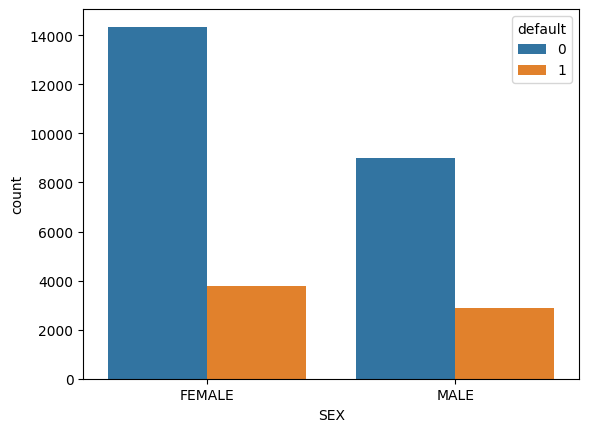

In [14]:
data_frame_cp = dataFrame.copy()
data_frame_cp = data_frame_cp.replace({"SEX":{1:"MALE",2:"FEMALE"}})
sea.countplot(data=data_frame_cp,x= data_frame_cp["SEX"],hue="default")
del data_frame_cp

<div dir="rtl" align="right">
<font face="XB Zar" size=4 color=red>بررسی ارتباط تحصیلات و بازپرداخت ها</font>
</div>

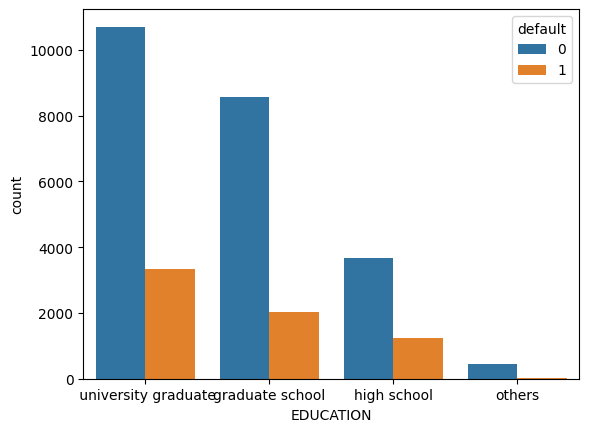

In [15]:
data_frame_cp = dataFrame.copy()
data_frame_cp = data_frame_cp.replace({"EDUCATION":{1:"graduate school",2:" university graduate",3:"high school",4:"others"}})
sea.countplot(data=data_frame_cp,x= data_frame_cp["EDUCATION"],hue="default")
del data_frame_cp

<div dir="rtl" align="right">
<font face="XB Zar" size=4 color=red>بررسی ارتباط وضعیت تاهل و بازپرداخت ها</font>
</div>

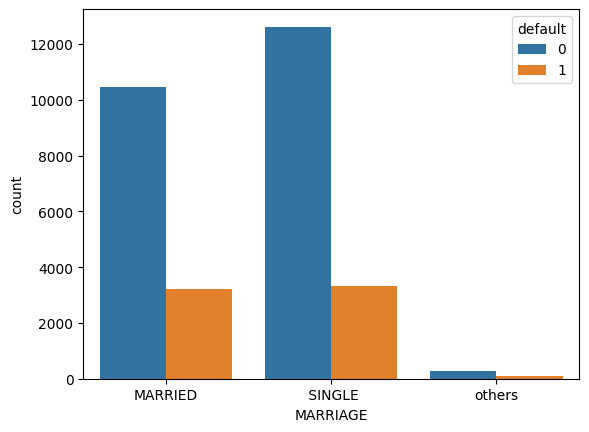

In [16]:
data_frame_cp = dataFrame.copy()
data_frame_cp = data_frame_cp.replace({"MARRIAGE":{1:"MARRIED",2:" SINGLE",3:"others"}})
sea.countplot(data=data_frame_cp,x= data_frame_cp["MARRIAGE"],hue="default")
del data_frame_cp

<div dir="rtl" align="right">
<font face="XB Zar" size=4 color=red>بررسی بیشتر جنسیت ارتباط وضعیت تاهل و بازپرداخت ها</font>
</div>

In [17]:
def query_dataFrame_generator(data :pd.DataFrame ,gender : str , marriage : str) :
    query_txt = str(f"MARRIAGE == '{ marriage }' and SEX == '{ gender }' ")
    default_query_result =  data.query( query_txt+" and default == 1").value_counts().__len__() 
    all_query_result = data.query(f"MARRIAGE == '{marriage}' and SEX == '{gender}' and default == 0").value_counts().__len__()
    default_query_result +=1
    all_query_result +=1
    print(f"result for {marriage} {gender} is as follows : total number = {all_query_result}, default = {default_query_result}, percentage = {(default_query_result/all_query_result)*100}")

gender = ["MALE","FEMALE"]
marriage = ["SINGLE","MARRIED"]
data_frame_cp = dataFrame.copy()
data_frame_cp = data_frame_cp.replace({"MARRIAGE":{1:"MARRIED",2:" SINGLE",3:"others"},"SEX":{1:"MALE",2:"FEMALE"}})
[query_dataFrame_generator(data_frame_cp,i,j) for i in gender for j in marriage]
del data_frame_cp

result for SINGLE MALE is as follows : total number = 1, default = 1, percentage = 100.0
result for MARRIED MALE is as follows : total number = 3845, default = 1347, percentage = 35.032509752925876
result for SINGLE FEMALE is as follows : total number = 1, default = 1, percentage = 100.0
result for MARRIED FEMALE is as follows : total number = 6610, default = 1861, percentage = 28.154311649016638


In [18]:
dataFrame.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : 
    {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
    'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, 
                  inplace = True)
dataFrame.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
labels = dataFrame["default"]
dataFrame = dataFrame.drop(columns="default")
dataFrame.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


<div dir="ltr" align="left">
<font face="XB Zar" size=6 color=red>PHASE #3 OF THE PROJECT</font>
</div>

<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=5 color=red>بررسی لاجستیک رگرشن بر روی دیتاست</font>
</div>

<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >رگرسیون لجستیک یک روش آماری است که برای مدل‌سازی رابطه بین یک متغیر وابسته دودویی (دو مقداری) و یک یا چند متغیر مستقل استفاده می‌شود. در این مدل، احتمال وقوع یک رویداد (مانند موفقیت یا شکست) بر اساس متغیرهای مستقل پیش‌بینی می‌شود. برای اعمال رگرسیون لجستیک به یک مجموعه داده، ابتدا داده‌ها تمیز و آماده‌سازی می‌شوند، سپس مدل رگرسیون لجستیک بر روی داده‌های آموزشی تنظیم می‌شود. این مدل با استفاده از تابع لجستیک (سیگموئید) احتمال وقوع کلاس‌های مختلف را بین صفر و یک پیش‌بینی می‌کند. در نهایت، دقت مدل با استفاده از داده‌های آزمون ارزیابی شده و تنظیمات بهینه‌ای برای بهبود پیش‌بینی‌ها اعمال می‌گردد.</font>
</div>

<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >رگرسیون لجستیک یک مدل آماری است که برای پیش‌بینی احتمال وقوع یک رویداد دودویی استفاده می‌شود. فرمول ریاضی این مدل به شرح زیر است:</font>
    <br>
    <br>
    <img src="./resources/logreg.png">
    <br>
    <p>در اینجا:

    p^(X)p^​(X) احتمال پیش‌بینی شده برای کلاس 1 است.
    ee پایه لگاریتم طبیعی است (تقریباً برابر با 2.71828).
    β0β0​ مقدار ثابت (عرض از مبدا) است.
    β1,β2,…,βnβ1​,β2​,…,βn​ ضرایب متغیرهای مستقل هستند.
    X1,X2,…,XnX1​,X2​,…,Xn​ متغیرهای مستقل هستند.
</div>
<hr>
<div allign=right> <div dir=rtl>
<p>همچنین میزان خطا به صورت زیر محاسبه میشود</p>
<br>
<img src="./resources/cost_log_reg.png">
 </div>


In [20]:
dataFrame.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataFrame.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataFrame.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
dataFrame.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [21]:
dataFrame_log_reg = dataFrame.copy()
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
dataFrame_log_reg = dataFrame.replace(encoders_nums)
dataFrame_log_reg.drop("ID",inplace=True,axis=1)
dataFrame_log_reg = pd.get_dummies(dataFrame,columns=['EDUCATION','MARRIAGE'])
dataFrame_log_reg.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)
dataFrame_log_reg = dataFrame_log_reg.replace({"SEX":{"FEMALE":0,"MALE":1}})
dataFrame_log_reg.head()
#had to store the education like this so we could assign a weight to each of them. 
#Additionally they had to be converted to float so we converted to boolean


/tmp/ipykernel_267877/3568358146.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame_log_reg = dataFrame.replace(encoders_nums)
/tmp/ipykernel_267877/3568358146.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame_log_reg = dataFrame_log_reg.replace({"SEX":{"FEMALE":0,"MALE":1}})


,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,689.0,0.0,0.0,0.0,0.0,False,False,True,True,False
1,2,120000.0,0,26,-1,2,0,0,0,2,...,1000.0,1000.0,1000.0,0.0,2000.0,False,False,True,False,True
2,3,90000.0,0,34,0,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,False,False,True,False,True
3,4,50000.0,0,37,0,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,False,False,True,True,False
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,False,False,True,True,False


<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >Standardization</font>
</div>
<hr>
<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >در این بخش لازم است دیتاست استاندارد سازی شود تا اظمینان حاصل شود که توزیع نرمال دیتا برابر یک و میانه صفر داشته باشد. علت این کار این است که میزان اثرگذاری هر فیچر بر مدل فقط بر اساس وزن آن مدل است </font>
</div>

In [22]:
scalar = StandardScaler()
scalar.fit_transform(dataFrame_log_reg)


array([[-1.73199307, -1.13672015, -0.81016074, ...,  1.06689977,
         1.09377971, -1.06647132],
       [-1.7318776 , -0.3659805 , -0.81016074, ...,  1.06689977,
        -0.91426088,  0.93767172],
       [-1.73176213, -0.59720239, -0.81016074, ...,  1.06689977,
        -0.91426088,  0.93767172],
       ...,
       [ 1.73176213, -1.05964618,  1.23432296, ...,  1.06689977,
        -0.91426088,  0.93767172],
       [ 1.7318776 , -0.67427636,  1.23432296, ..., -0.93729517,
         1.09377971, -1.06647132],
       [ 1.73199307, -0.90549825,  1.23432296, ...,  1.06689977,
         1.09377971, -1.06647132]])

<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >train & test dataset split</font>
</div>
<hr>
<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >جدا سازی دیتاست های ترین و تست </font>
</div>

In [23]:
train_dataset, test_dataset,train_label, test_label = train_test_split(dataFrame_log_reg, labels, test_size=0.33, random_state=42, stratify=labels)
# 67% training data and 33% test data
# using stratify to ensure same distribution of defaulters in both test and train dataset


<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >Hyper parameters</font>
</div>
<hr>
<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >پیدا کردن هایپر پارامتر ها برای جلوگیری از اورفیت شدن و یا اندرفیت شدن دیتاست  </font>
    <br>
    <font>
    در مورد رگرسیون لجستیک، چندین ابرپارامتر وجود دارد که ممکن است نیاز به تنظیم داشته باشند. .
 ابرپارامترهای کلیدی در رگرسیون لجستیک عبارت اند از
</font>
<br>
<p>
 جریمه:
        penalty: نوع تنظیمی که اعمال می‌شود.
            'l1': تنظیم L1، که می‌تواند منجر به مدل‌های پراکنده با برخی ضرایب دقیقاً صفر شود (انتخاب ویژگی).
            'l2': تنظیم L2، که خطا را در بین تمامی ضرایب پخش می‌کند (کوچک‌سازی).

    قدرت تنظیم:
        C: معکوس قدرت تنظیم (1λλ1​).
            مقادیر کوچکتر تنظیم قوی‌تری را مشخص می‌کنند.
            مقادیر بزرگتر تنظیم ضعیف‌تری را مشخص می‌کنند.
        مقادیر نمونه: [0.001, 0.01, 0.1, 1, 10, 100, 1000]

    حل‌کننده:
        solver: الگوریتمی که در مسئله بهینه‌سازی استفاده می‌شود.
            'liblinear': مناسب برای مجموعه داده‌های کوچک، پشتیبانی از تنظیم L1 و L2.
            'lbfgs': بهینه‌سازی در خانواده روش‌های شبه-نیوتن، پشتیبانی از تنظیم L2.
            'newton-cg': مشابه 'lbfgs'، مناسب برای تنظیم L2.
            'sag': نزول میانگین استوکاستیک، مناسب برای مجموعه داده‌های بزرگ، پشتیبانی از تنظیم L2.
            'saga': نسخه بهبود یافته SAG که همچنین از تنظیم L1 و تنظیم شبکه‌الاستیک پشتیبانی می‌کند.

    حداکثر تعداد تکرارها:
        max_iter: حداکثر تعداد تکرارهایی که حل‌کننده‌ها برای همگرایی انجام می‌دهند.
            مقدار نمونه: 100, 200, 500

    تحمل برای معیار توقف:
        tol: تحمل برای معیار توقف.
            مقدار نمونه: 1e-4
</p>
</div>

In [71]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
tuned_params = GridSearchCV(LogisticRegression(max_iter=2000,solver="liblinear"), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)
tuned_params.fit(train_dataset, train_label)


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.779 total time=   0.3s
[CV 2/3] END ................C=0.01, penalty=l2;, score=0.779 total time=   0.3s
[CV 1/3] END ...............C=0.001, penalty=l1;, score=0.781 total time=   0.6s
[CV 3/3] END ................C=0.01, penalty=l1;, score=0.806 total time=   0.9s
[CV 3/3] END ...............C=0.001, penalty=l1;, score=0.780 total time=   1.0s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.779 total time=   1.1s
[CV 1/3] END ................C=0.01, penalty=l1;, score=0.809 total time=   1.2s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.779 total time=   0.3s
[CV 1/3] END ................C=0.01, penalty=l2;, score=0.779 total time=   1.3s
[CV 2/3] END .................C=0.1, penalty=l1;, score=0.815 total time=   1.0s
[CV 2/3] END ................C=0.01, penalty=l1;, score=0.812 total time=   1.4s
[CV 1/3] END .................C=0.1, penalty=l1;

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=2000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [72]:
best_estimator = tuned_params.best_estimator_
best_params = tuned_params.best_params_
print(f'best_estimator: {best_estimator} & best params : {best_params}. best score : {tuned_params.best_score_}')

best_estimator: LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='liblinear') & best params : {'C': 1, 'penalty': 'l1'}. best score : 0.8121393034825871


In [ ]:
train_class_predict = best_estimator.predict(train_dataset)
test_class_predict = best_estimator.predict(test_dataset)
test_accuracy = accuracy_score(test_class_predict,test_label)
train_accuracy = accuracy_score(train_class_predict,train_label)
print("The accuracy on train data is ", int(train_accuracy*100))
print("The accuracy on test data is ", int(test_accuracy* 100))


The accuracy on train data is  81
The accuracy on test data is  80


<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >Precision and Recall</font>
</div>
<hr>
<div allign=right> <div dir=rtl>
    <font face= "XB Zar" size=4 >پیدا کردن هایپر پارامتر ها برای جلوگیری از اورفیت شدن و یا اندرفیت شدن دیتاست  </font>
    <br>
    <font>
    دقت و بازیابی دو مفهوم بسیار مهم در ارزیابی عملکرد مدل های طبقه بندی هستند. دقت به این موضوع اشاره دارد که از مجموع نمونه هایی که مدل آنها را مثبت پیش بینی کرده است، چه تعدادی واقعاً مثبت بوده اند. به عبارت دیگر، دقت بالا نشان می دهد که مدل در طبقه بندی نمونه های مثبت دقیق عمل کرده است. از طرف دیگر، بازیابی نشان می دهد که از کل نمونه های مثبت واقعی، مدل چند درصد از آنها را به درستی شناسایی کرده است. یک مقدار بازیابی بالا به این معناست که مدل اکثر نمونه های مثبت را از دست نداده است.
در بسیاری از کاربردها مانند تشخیص بیماری، دقت و بازیابی هر دو بسیار مهم هستند. یک مدل با دقت بالا اما بازیابی پایین، می تواند نمونه های سالم را به درستی تشخیص دهد اما تعداد زیادی از نمونه های بیمار را از دست بدهد که این امر نامطلوب است. از طرف دیگر، یک مدل با بازیابی بالا اما دقت پایین، اکثر نمونه های بیمار را شناسایی می کند اما تعداد زیادی نمونه سالم را نیز به اشتباه بیمار تشخیص می دهد که این موضوع نیز مطلوب نیست. بنابراین معمولاً سعی می شود تا از مدل هایی استفاده شود که تعادل مناسبی بین دقت و بازیابی داشته باشد.
</font>
<br>
<font>
دقت و بازیابی بر اساس چهار مفهوم اصلی مثبت واقعی، منفی واقعی، مثبت کاذب و منفی کاذب تعریف می شوند. مثبت واقعی (True Positive) به تعداد نمونه هایی اشاره دارد که واقعاً مثبت بوده و مدل نیز آنها را به درستی مثبت پیش بینی کرده است. منفی واقعی (True Negative) تعداد نمونه هایی است که واقعاً منفی بوده و مدل نیز آنها را درست منفی شناسایی کرده است.
از طرف دیگر، مثبت کاذب (False Positive) به تعداد نمونه هایی گفته می شود که در واقعیت منفی هستند اما مدل آنها را اشتباهاً مثبت پیش بینی کرده است. منفی کاذب (False Negative) نیز تعداد نمونه هایی است که واقعاً مثبت بوده اند اما مدل نتوانسته آنها را درست تشخیص دهد.
دقت برابر است با نسبت مثبت های واقعی به مجموع مثبت های واقعی و مثبت های کاذب. بازیابی نیز برابر است با نسبت مثبت های واقعی به مجموع مثبت های واقعی و منفی های کاذب. یک مدل ایده آل باید مثبت های واقعی زیادی داشته باشد و در عین حال مثبت های کاذب و منفی های کاذب آن کم باشد تا دقت و بازیابی هر دو در سطح مطلوبی قرار گیرند.
</font>
<br>
</div>

In [ ]:
test_accuracy_precision = precision_score(test_class_predict,test_label)
test_accuracy_recall = recall_score(test_class_predict,test_label)
print(f" models precision on the test set: {test_accuracy_precision}\n models recall on the test set {test_accuracy_recall}")

 models precision on the test set: 0.2410958904109589
 models recall on the test set 0.6965699208443272


<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >F1 Score</font>
</div>
<hr>
<div allign=right> <div dir=rtl>    
<font>
یک معیار ترکیبی است که با تلفیق دقت و بازیابی محاسبه می شود. این نمره برای ارزیابی کلی عملکرد یک مدل طبقه بندی در مواردی که هم دقت و هم بازیابی مهم هستند، مفید است.
نمره F1 میانگین هارمونیک دقت و بازیابی است و با فرمول زیر محاسبه می شود:
<div dir=ltr>F1 = 2 * ((دقت * بازیابی) / (دقت + بازیابی))</div>
دامنه مقادیر نمره F1 بین 0 تا 1 است. هرچه این نمره به 1 نزدیک تر باشد، نشان دهنده عملکرد بهتر مدل است. یک مدل با نمره F1 بالا هم دقت خوبی دارد و هم بازیابی مناسبی.
اگر دقت و بازیابی برابر باشند، نمره F1 نیز با آنها برابر خواهد شد. اما اگر تفاوت زیادی بین دقت و بازیابی باشد، نمره F1 تمایل به سمت مقدار کوچکتر خواهد داشت.
به طور کلی، نمره F1 یک معیار جامع برای ارزیابی مدل های طبقه بندی است که هم دقت و هم بازیابی را در نظر می گیرد. این نمره برای مسائلی که هر دو جنبه مهم هستند، مانند تشخیص بیماری، بسیار کاربردی است
</font>

In [ ]:
test_f1_score = f1_score(test_class_predict,test_label)
print(f"f1 score {test_f1_score}")

f1 score 0.3582089552238806


<div allign=left> <div>
    <font face= "XB Zar" size=5 color=red >Analysis</font>
    <hr>
</div>
<div allign=left dir="rtl">
 <font>همانطور که مشاهده میشود الگوریتم رگرشن لاجستیک تا با اینکه ریکال قابل قبولی ارایه می‌دهد و دقت آن در دیتاست تست تقریبا ۸۰٪است  ریکال پایینی دارد که با توجه به تریدآف میان این دو 
 ظبیعی است</font>
<div>


<div allign=left> <div>
    <font face= "XB Zar" size=6 color=red >SVM</font>
    <hr>
</div>
<div allign=left dir="rtl">
<font>
SVM (support vector machine) یک الگوریتم نظارت‌شده (Supervised Learning) است که برای مسائل دسته‌بندی و رگرسیون به کار می‌رود. هدف اصلی SVM پیدا کردن یک مرز تصمیم‌گیری (Decision Boundary) بهینه است که داده‌ها را به درستی به دو دسته مختلف تقسیم کند.
</font>
<br>
<font>
    SVM سعی می‌کند یک hyperplane (در حالت دوبعدی، یک خط) را پیدا کند که داده‌های دو دسته مختلف را از هم جدا کند. این hyperplane باید به گونه‌ای باشد که فاصله‌ی داده‌ها از آن (Margin) به بیشترین حد ممکن برسد. این فاصله را Margin می‌نامند.
</font>
<br>
<font>
الگوریتم SVM تلاش می‌کند تا Margin را ماکزیمم کند. یعنی hyperplaneای را پیدا کند که بیشترین فاصله را از نزدیک‌ترین نقاط هر دسته داشته باشد. این نقاط نزدیک به hyperplane را Hyperplane (Support Vectors) می‌نامند و فقط این نقاط در تعیین ابرصفحه نقش دارند.
</font>
<div>

In [92]:
svm_model = GridSearchCV(SVC(probability=True),{'C': [0.01,1,10,100],'kernel':['rbf','sigmoid']},scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
svm_model.fit(train_dataset,train_label)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ...............C=1, kernel=sigmoid;, score=0.666 total time= 1.7min
[CV 3/3] END ...............C=1, kernel=sigmoid;, score=0.671 total time= 1.8min
[CV 2/3] END ...............C=1, kernel=sigmoid;, score=0.669 total time= 1.8min
[CV 3/3] END ................C=0.01, kernel=rbf;, score=0.779 total time= 1.9min
[CV 2/3] END ................C=0.01, kernel=rbf;, score=0.779 total time= 1.9min
[CV 1/3] END ................C=0.01, kernel=rbf;, score=0.779 total time= 2.0min
[CV 1/3] END ............C=0.01, kernel=sigmoid;, score=0.779 total time= 2.4min
[CV 2/3] END ............C=0.01, kernel=sigmoid;, score=0.779 total time= 2.4min
[CV 3/3] END ............C=0.01, kernel=sigmoid;, score=0.779 total time= 2.4min
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.779 total time= 2.7min
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.779 total time= 2.7min
[CV 3/3] END ...................C=1, kernel=rbf;,

GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100], 'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [93]:
svm_model_selected = svm_model.best_estimator_
svm_best_params = svm_model.best_params_
svm_best_score = svm_model.best_score_
print(f'best_estimator: {svm_model_selected} & best params : {svm_best_params}. best score : {svm_best_score}')

best_estimator: SVC(C=0.01, probability=True) & best params : {'C': 0.01, 'kernel': 'rbf'}. best score : 0.7788059701492537


In [98]:
train_class_predict_svm = svm_model_selected.predict(train_dataset)
test_class_predict_svm = svm_model_selected.predict(test_dataset)

In [100]:
test_accuracy_svm = accuracy_score(test_class_predict_svm,test_label)
train_accuracy_svm = accuracy_score(train_class_predict_svm,train_label)
print(f"The accuracy on train data: {int(train_accuracy_svm*100)} ")
print(f"The accuracy on test data {int(test_accuracy_svm* 100)} ")

The accuracy on train data: 77 
The accuracy on test data 77 


In [103]:
test_precision_score_svm = precision_score(test_class_predict_svm,test_label)
test_recall_score_SVC = recall_score(test_class_predict_svm,test_label)
test_f1_score_svm = f1_score(test_class_predict,test_label)
print(f" models precision on the test set: {test_accuracy_precision}\n models recall on the test set {test_accuracy_recall}\n f1 score {test_f1_score_svm}")

 models precision on the test set: 0.2410958904109589
 models recall on the test set 0.6965699208443272
 f1 score 0.3582089552238806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



<div allign=left> <div>
    <font face= "XB Zar" size=6 color=red >Decision Tree</font>
    <hr>
</div>
<div allign=left dir="rtl">
<font>
درخت تصمیم یک مدل پیش‌بینی است که از ساختاری درختی برای تصمیم‌گیری استفاده می‌کند. هر گره داخلی درخت نشان‌دهنده یک ویژگی (Feature) از داده‌ها است و هر شاخه نشان‌دهنده نتیجه (Outcome) از آن ویژگی است. برگ‌های درخت نشان‌دهنده برچسب (Label) یا خروجی نهایی هستند.
</font>
<br>
<font>
   فرآیند ساخت درخت تصمیم از ریشه آغاز می‌شود. در ابتدا، کل داده‌های آموزشی در این گره قرار می‌گیرند.
</font>
<br>
<font>
در هر مرحله، داده‌ها براساس یکی از ویژگی‌ها به دو یا چند دسته تقسیم می‌شوند. انتخاب ویژگی و نحوه تقسیم براساس معیاری انجام می‌شود که بهترین تقسیم‌بندی (با کمترین ناخالصی) را ایجاد کند
</font>
<div>

In [106]:
decision_tree = GridSearchCV(DecisionTreeClassifier(),{'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]},scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
decision_tree.fit(train_dataset,train_label)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[CV 1/3] END max_depth=20, min_samples_split=0.4;, score=0.816 total time=   0.2s
[CV 2/3] END max_depth=20, min_samples_split=0.4;, score=0.825 total time=   0.2s
[CV 1/3] END max_depth=20, min_samples_split=0.2;, score=0.816 total time=   0.2s
[CV 2/3] END max_depth=20, min_samples_split=0.2;, score=0.825 total time=   0.2s
[CV 1/3] END max_depth=20, min_samples_split=0.1;, score=0.817 total time=   0.2s
[CV 3/3] END max_depth=20, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 2/3] END max_depth=30, min_samples_split=0.1;, score=0.826 total time=   0.2s
[CV 1/3] END max_depth=30, min_samples_split=0.1;, score=0.817 total time=   0.2s
[CV 3/3] END max_depth=20, min_samples_split=0.4;, score=0.819 total time=   0.1s
[CV 3/3] END max_depth=20, min_samples_split=0.2;, score=0.819 total time=   0.3s
[CV 2/3] END max_depth=20, min_samples_split=0.1;, score=0.826 total time=   0.3s
[CV 3/3] END max_depth=30, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 2/3] END max

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [107]:
decision_tree_model = decision_tree.best_estimator_
tree_best_params = decision_tree.best_params_
tree_best_score = decision_tree.best_score_
print(f'best_estimator: {decision_tree_model} & best params : {tree_best_params}. best score : {tree_best_score}')

best_estimator: DecisionTreeClassifier(max_depth=20, min_samples_split=0.1) & best params : {'max_depth': 20, 'min_samples_split': 0.1}. best score : 0.8203980099502487


In [109]:
tree_train_class_predict = decision_tree_model.predict(train_dataset)
tree_test_class_predict =decision_tree_model.predict(test_dataset)
tree_train_accuracy = accuracy_score(tree_train_class_predict,train_label)
tree_test_accuracy_DTC = accuracy_score(tree_test_class_predict,test_label)
tree_precision_score_svm = precision_score(tree_test_class_predict,test_label)
test_recall_score_SVC = recall_score(tree_test_class_predict,test_label)
test_f1_score_svm = f1_score(test_class_predict,test_label)
print(f"The accuracy on train data: {int(train_accuracy_svm*100)} ")
print(f"The accuracy on test data {int(test_accuracy_svm* 100)} ")
print(f" models precision on the test set: {test_accuracy_precision}\n models recall on the test set {test_accuracy_recall}\n f1 score {test_f1_score_svm}")


The accuracy on train data: 77 
The accuracy on test data 77 
 models precision on the test set: 0.2410958904109589
 models recall on the test set 0.6965699208443272
 f1 score 0.3582089552238806
